In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [37]:
df = pd.read_csv('warfarin_new_bert.csv')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,33,44,52,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
df.head()

,Unnamed: 0,PharmGKB Subject ID,Gender,Race,Ethnicity,Age,Height (cm),Weight (kg),Indication for Warfarin Treatment,Comorbidities,...,feature758,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767
0,0,PA135312261,male,White,not Hispanic or Latino,60 - 69,193.04,115.7,7,No Cancer,...,-0.330405,0.137789,0.753619,-0.312199,-0.348907,-0.137807,0.043346,-0.395942,0.165917,-0.158285
1,1,PA135312262,female,White,not Hispanic or Latino,50 - 59,176.53,144.2,7,Cancer,...,-0.418389,0.367120,-0.172713,0.170417,-0.134634,0.411461,0.224633,-0.540502,0.254975,-0.284507
2,2,PA135312263,female,White,not Hispanic or Latino,40 - 49,162.56,77.1,7,No Cancer,...,-0.330405,0.137789,0.753619,-0.312199,-0.348907,-0.137807,0.043346,-0.395942,0.165917,-0.158285
3,3,PA135312264,male,White,not Hispanic or Latino,60 - 69,182.24,90.7,7,No Cancer,...,-0.330405,0.137789,0.753619,-0.312199,-0.348907,-0.137807,0.043346,-0.395942,0.165917,-0.158285
4,4,PA135312265,male,White,not Hispanic or Latino,50 - 59,167.64,72.6,7,No Cancer,...,-0.330405,0.137789,0.753619,-0.312199,-0.348907,-0.137807,0.043346,-0.395942,0.165917,-0.158285


In [39]:
features = ['feature'+str(x) for x in range(0,768)]

In [40]:
features

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature14',
 'feature15',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21',
 'feature22',
 'feature23',
 'feature24',
 'feature25',
 'feature26',
 'feature27',
 'feature28',
 'feature29',
 'feature30',
 'feature31',
 'feature32',
 'feature33',
 'feature34',
 'feature35',
 'feature36',
 'feature37',
 'feature38',
 'feature39',
 'feature40',
 'feature41',
 'feature42',
 'feature43',
 'feature44',
 'feature45',
 'feature46',
 'feature47',
 'feature48',
 'feature49',
 'feature50',
 'feature51',
 'feature52',
 'feature53',
 'feature54',
 'feature55',
 'feature56',
 'feature57',
 'feature58',
 'feature59',
 'feature60',
 'feature61',
 'feature62',
 'feature63',
 'feature64',
 'feature65',
 'feature66',
 'feature67',
 'feature68',
 'feature69',
 'feature70',
 'feature71',
 '

In [54]:
x = df.loc[:, features].values

In [55]:
# Standardizing the features
#x = StandardScaler().fit_transform(x)

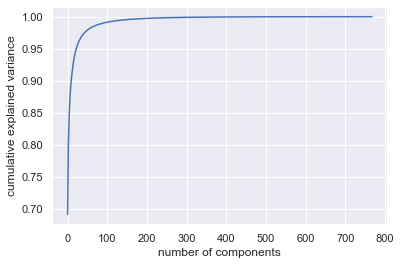

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
#plt.axis([0,768,0.6,1.0])
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [59]:
pca = PCA(n_components=768)
pca.fit(x)
print(pca.explained_variance_ratio_)
X_pca = pca.transform(x)
print("original shape:   ", x.shape)
print("transformed shape:", X_pca.shape)

[6.91473054e-01 6.26052028e-02 4.57146683e-02 2.64492704e-02
 1.97746496e-02 1.54113796e-02 1.32902448e-02 9.29478561e-03
 8.77946384e-03 6.97560932e-03 6.14142774e-03 5.32146909e-03
 5.08229296e-03 4.99017452e-03 4.52905764e-03 4.30684116e-03
 3.94883126e-03 3.45835702e-03 3.01791481e-03 2.69226728e-03
 2.61344773e-03 2.35461274e-03 2.24855022e-03 2.09476101e-03
 1.94745269e-03 1.81234876e-03 1.65814139e-03 1.48677976e-03
 1.39934301e-03 1.36766734e-03 1.28131160e-03 1.21531494e-03
 1.14032453e-03 1.05832810e-03 1.01889216e-03 9.77399021e-04
 9.43617642e-04 8.74951219e-04 8.47144705e-04 8.03254577e-04
 7.79826195e-04 7.26095858e-04 6.87644905e-04 6.74179266e-04
 6.24445210e-04 6.00637943e-04 5.84333733e-04 5.47640549e-04
 5.36275619e-04 4.89710739e-04 4.70131267e-04 4.67412776e-04
 4.63234223e-04 4.46668861e-04 4.33694216e-04 4.19022169e-04
 4.14350374e-04 3.80881381e-04 3.72537143e-04 3.58118273e-04
 3.45390479e-04 3.37649237e-04 3.21934098e-04 3.11892429e-04
 3.10656797e-04 2.988613

In [60]:
count=0.0
pca_list = pca.explained_variance_ratio_
for i in range(0,len(pca_list)):
    count+=pca_list[i]
    print(count)
    if count >= 0.99:
        print('index is',i)

0.6914730541361104
0.7540782569646075
0.7997929252402756
0.8262421956305619
0.846016845263237
0.861428224909022
0.8747184697504606
0.8840132553578667
0.8927927191938584
0.8997683285110936
0.9059097562517718
0.9112312253440855
0.9163135183025825
0.9213036928227702
0.9258327504623339
0.9301395916249933
0.9340884228836308
0.9375467798999388
0.9405646947097788
0.9432569619947784
0.9458704097296508
0.9482250224683783
0.9504735726894593
0.9525683336987911
0.954515786393079
0.956328135149744
0.9579862765369099
0.959473056297149
0.9608723993031077
0.9622400666443774
0.9635213782470758
0.9647366931829171
0.9658770177118915
0.9669353458108643
0.9679542379749252
0.9689316369963106
0.9698752546384484
0.9707502058572468
0.9715973505621144
0.972400605139459
0.973180431334823
0.9739065271929764
0.9745941720981172
0.9752683513644077
0.9758927965744373
0.9764934345179082
0.9770777682506642
0.9776254087993353
0.9781616844187677
0.978651395157439
0.9791215264248516
0.9795889392011806
0.9800521734237483
0

In [53]:
X_pca[0].shape

(768,)

In [46]:
X_pca[0]

array([-1.55036614e-01,  9.98725881e-01, -8.06335740e-01,  1.39059330e+00,
       -3.15191275e+00,  5.84677095e+00, -2.38433561e+00,  3.53140153e-01,
       -7.91553074e-01, -7.86837128e-02,  4.94254535e-01, -2.21528973e-02,
       -4.55917642e-01, -3.65577011e-01, -4.77290298e-01, -4.35114574e-01,
        4.49561237e-01, -9.31983987e-02,  4.35693362e-01,  2.20364016e-01,
       -1.96813653e-01, -5.24101506e-02, -1.80338518e-01,  1.50714214e-01,
       -4.51199639e-02, -7.13204933e-02, -1.21936827e-01, -3.53000055e-02,
        8.01099059e-02,  3.80622477e-02,  4.89250068e-02,  2.15438362e-02,
        2.58461270e-02,  7.91948044e-03, -1.01984173e-01,  3.76222180e-02,
        2.45937795e-02, -1.70173649e-02,  8.07931207e-03, -1.49847651e-02,
        6.84071743e-03,  1.54381016e-02, -7.00642405e-02, -3.05389610e-02,
       -3.96507110e-02, -2.01596774e-03, -8.14277811e-03, -4.18398283e-03,
        1.49279938e-02,  4.97997245e-03,  3.84245389e-04, -3.58198190e-02,
       -2.05248414e-02,  

In [62]:
pca = PCA(n_components=90)
pca.fit(x)
#print(pca.explained_variance_ratio_)
X_pca = pca.transform(x)
print("original shape:   ", x.shape)
print("transformed shape:", X_pca.shape)

original shape:    (5701, 768)
transformed shape: (5701, 90)


In [63]:
X_pca

array([[-1.55036614e-01,  9.98725881e-01, -8.06335740e-01, ...,
         1.36252384e-03, -3.41948788e-03, -4.30532244e-03],
       [-3.17306493e+00,  4.26798996e-02, -4.23653466e-01, ...,
        -4.97367860e-02,  2.21824203e-03, -5.35521830e-02],
       [-1.55036614e-01,  9.98725881e-01, -8.06335740e-01, ...,
         1.36252384e-03, -3.41948788e-03, -4.30532244e-03],
       ...,
       [ 4.42175953e+00, -1.51483185e+00, -1.31704693e+00, ...,
         4.26669981e-02,  4.07671172e-02, -1.29613418e-02],
       [ 3.44979084e+00,  1.42397079e+00,  3.51525087e+00, ...,
        -2.91404224e-02, -1.56428755e-02, -3.46386822e-02],
       [-5.58053638e+00, -2.43017180e-01,  6.52938222e-02, ...,
        -2.04297239e-04,  6.31533939e-04, -3.90971922e-05]])

In [64]:
df_bert = pd.DataFrame(data=X_pca, columns=[ "feature"+str(x) for x in range(0,90)])

In [65]:
df_bert

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89
0,-0.155037,0.998726,-0.806336,1.390593,-3.151913,5.846771,-2.384336,0.353140,-0.791553,-0.078684,...,0.006521,0.001905,-0.006999,-0.009198,-0.002147,0.003164,-0.008107,0.001363,-0.003419,-0.004305
1,-3.173065,0.042680,-0.423653,1.317266,-0.561621,1.042149,0.167193,0.476464,1.766482,0.788676,...,0.029300,-0.029194,-0.015478,-0.027983,-0.009489,-0.019552,-0.009009,-0.049737,0.002218,-0.053552
2,-0.155037,0.998726,-0.806336,1.390593,-3.151913,5.846771,-2.384336,0.353140,-0.791553,-0.078684,...,0.006521,0.001905,-0.006999,-0.009198,-0.002147,0.003164,-0.008107,0.001363,-0.003419,-0.004305
3,-0.155037,0.998726,-0.806336,1.390593,-3.151913,5.846771,-2.384336,0.353140,-0.791553,-0.078684,...,0.006521,0.001905,-0.006999,-0.009198,-0.002147,0.003164,-0.008107,0.001363,-0.003419,-0.004305
4,-0.155037,0.998726,-0.806336,1.390593,-3.151913,5.846771,-2.384336,0.353140,-0.791553,-0.078684,...,0.006521,0.001905,-0.006999,-0.009198,-0.002147,0.003164,-0.008107,0.001363,-0.003419,-0.004305
5,-0.155037,0.998726,-0.806336,1.390593,-3.151913,5.846771,-2.384336,0.353140,-0.791553,-0.078684,...,0.006521,0.001905,-0.006999,-0.009198,-0.002147,0.003164,-0.008107,0.001363,-0.003419,-0.004305
6,-0.155037,0.998726,-0.806336,1.390593,-3.151913,5.846771,-2.384336,0.353140,-0.791553,-0.078684,...,0.006521,0.001905,-0.006999,-0.009198,-0.002147,0.003164,-0.008107,0.001363,-0.003419,-0.004305
7,-0.155037,0.998726,-0.806336,1.390593,-3.151913,5.846771,-2.384336,0.353140,-0.791553,-0.078684,...,0.006521,0.001905,-0.006999,-0.009198,-0.002147,0.003164,-0.008107,0.001363,-0.003419,-0.004305
8,-3.173065,0.042680,-0.423653,1.317266,-0.561621,1.042149,0.167193,0.476464,1.766482,0.788676,...,0.029300,-0.029194,-0.015478,-0.027983,-0.009489,-0.019552,-0.009009,-0.049737,0.002218,-0.053552
9,-0.155037,0.998726,-0.806336,1.390593,-3.151913,5.846771,-2.384336,0.353140,-0.791553,-0.078684,...,0.006521,0.001905,-0.006999,-0.009198,-0.002147,0.003164,-0.008107,0.001363,-0.003419,-0.004305


In [66]:
df1 = df.drop(features, axis=1)

In [67]:
df1

,Unnamed: 0,PharmGKB Subject ID,Gender,Race,Ethnicity,Age,Height (cm),Weight (kg),Indication for Warfarin Treatment,Comorbidities,...,VKORC1 -1639 consensus,VKORC1 497 consensus,VKORC1 1173 consensus,VKORC1 1542 consensus,VKORC1 3730 consensus,VKORC1 2255 consensus,VKORC1 -4451 consensus,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,0,PA135312261,male,White,not Hispanic or Latino,60 - 69,193.04,115.7,7,No Cancer,...,A/G,G/T,NaN,C/G,A/G,NaN,NaN,NaN,NaN,NaN
1,1,PA135312262,female,White,not Hispanic or Latino,50 - 59,176.53,144.2,7,Cancer,...,A/A,G/T,T/T,C/C,G/G,T/T,C/C,NaN,NaN,NaN
2,2,PA135312263,female,White,not Hispanic or Latino,40 - 49,162.56,77.1,7,No Cancer,...,G/G,T/T,NaN,G/G,A/G,NaN,NaN,NaN,NaN,NaN
3,3,PA135312264,male,White,not Hispanic or Latino,60 - 69,182.24,90.7,7,No Cancer,...,A/G,G/T,NaN,C/G,G/G,NaN,NaN,NaN,NaN,NaN
4,4,PA135312265,male,White,not Hispanic or Latino,50 - 59,167.64,72.6,7,No Cancer,...,A/G,T/T,NaN,C/G,A/G,NaN,NaN,NaN,NaN,NaN
5,5,PA135312266,male,White,not Hispanic or Latino,40 - 49,177.80,104.3,7,No Cancer,...,G/G,T/T,NaN,G/G,A/G,NaN,NaN,NaN,NaN,NaN
6,6,PA135312267,male,White,not Hispanic or Latino,70 - 79,167.64,84.8,7,No Cancer,...,G/G,T/T,NaN,G/G,A/A,NaN,NaN,NaN,NaN,NaN
7,7,PA135312268,male,White,not Hispanic or Latino,40 - 49,187.96,99.8,7,No Cancer,...,A/G,G/T,NaN,C/G,G/G,NaN,NaN,NaN,NaN,NaN
8,8,PA135312269,female,White,not Hispanic or Latino,60 - 69,160.02,106.6,7,Cancer,...,G/G,T/T,NaN,G/G,A/A,NaN,NaN,NaN,NaN,NaN
9,9,PA135312270,male,White,not Hispanic or Latino,60 - 69,177.80,93.9,7,No Cancer,...,A/G,T/T,NaN,C/G,A/G,NaN,NaN,NaN,NaN,NaN


In [68]:
result = pd.concat([df1, df_bert], axis=1, sort=False)
#print(result)
result.to_csv('warfarin_pca_bert.csv')